<h1><center>Merging Joining and Concatenating DataFrames</center></h1>

In [78]:
import numpy as np
import pandas as pd

In [79]:
courses = pd.read_csv('courses.csv') # courses contain a dataset where a list of courses with their price.
students = pd.read_csv('students.csv') # this students contain student dataset in which there is a student_id. name and their study partner is given

nov = pd.read_csv('reg-month1.csv') # this nov dataset contain which student enroll in our batch
dec = pd.read_csv('reg-month2.csv') # this dec dataset contain which student enroll in our batch


deliveries = pd.read_csv('deliveries.csv')
matches = pd.read_csv('matches.csv')



In [80]:
dec

,student_id,course_id
0,3,5
1,16,7
2,12,10
3,12,1
4,14,9
5,7,7
6,7,2
7,16,3
8,17,10
9,11,8


In [81]:
# pd.concat
# ignore_index
# df.append
# multindex -> fetch using iloc
# concat dataframes horizontally

***<center>🚀 pd.concat***

**pd.concat is used to merge data upar niche ke structure me(vertical)**

In [82]:
print(pd.concat([nov, dec]).shape)

pd.concat([nov, dec]).reset_index()

registration = pd.concat([nov, dec], ignore_index = True)

# reset_index() and ignore_index = True are the same

(53, 2)


# **Pandas `concat()` - Detailed and Complete Notes**

## **1️⃣ Introduction to `concat()`**
The `pandas.concat()` function is used to concatenate (combine) two or more Pandas objects (such as DataFrames or Series) along a specified axis (rows or columns). It is a fundamental function for data manipulation and merging in Pandas.

### **Syntax:**
```python
import pandas as pd

pd.concat(objs, axis=0, join='outer', ignore_index=False, keys=None, names=None, 
          levels=None, verify_integrity=False, sort=False, copy=True)
```

### **Parameters:**
| Parameter            | Description |
|----------------------|-------------|
| **`objs`**          | A sequence (list, tuple, etc.) of Pandas objects (Series or DataFrames) to concatenate. |
| **`axis`**          | The axis along which to concatenate. `0` (default) for rows, `1` for columns. |
| **`join`**          | Determines how indexes are matched: `'outer'` (default, union of indexes) or `'inner'` (intersection of indexes). |
| **`ignore_index`**  | If `True`, discards original index and assigns a new default integer index. |
| **`keys`**          | Used to create a hierarchical index (MultiIndex) by assigning keys to concatenated pieces. |
| **`names`**         | Assigns names to created MultiIndex levels if `keys` is used. |
| **`levels`**        | Specific index levels to use in a MultiIndex. |
| **`verify_integrity`** | If `True`, raises an error if duplicate indexes exist in the concatenated data. |
| **`sort`**          | If `True`, sorts columns when `join='outer'`. Default is `False`. |
| **`copy`**          | If `False`, avoids unnecessary data copying to improve performance. Default is `True`. |

---

## **2️⃣ Concatenating DataFrames Vertically (Row-wise)**
When `axis=0` (default), `concat()` stacks DataFrames on top of each other, extending the number of rows.

### **Example 1: Default Row-wise Concatenation**
```python
import pandas as pd

df1 = pd.DataFrame({'A': [1, 2], 'B': [3, 4]})
df2 = pd.DataFrame({'A': [5, 6], 'B': [7, 8]})

result = pd.concat([df1, df2])
print(result)
```
#### **Output:**
```
   A  B
0  1  3
1  2  4
0  5  7
1  6  8
```
🔹 The index is preserved, which results in duplicate index values.

### **Example 2: Reset Index (`ignore_index=True`)**
To reset the index and avoid duplicate index values:
```python
result = pd.concat([df1, df2], ignore_index=True)
print(result)
```
#### **Output:**
```
   A  B
0  1  3
1  2  4
2  5  7
3  6  8
```
✔ **Best practice:** Use `ignore_index=True` when the original index is no longer relevant.

---

## **3️⃣ Concatenating DataFrames Horizontally (Column-wise)**
When `axis=1`, `concat()` combines DataFrames column-wise, extending the number of columns.

### **Example 3: Column-wise Concatenation (`axis=1`)**
```python
df1 = pd.DataFrame({'A': [1, 2]})
df2 = pd.DataFrame({'B': [3, 4]})

result = pd.concat([df1, df2], axis=1)
print(result)
```
#### **Output:**
```
   A  B
0  1  3
1  2  4
```
✔ **Use case:** Useful when combining datasets with different features (columns).

---

## **4️⃣ Handling Different Column Names (`join` Parameter)**
If DataFrames have different columns, `join` controls whether to keep all columns (`outer` join) or only common columns (`inner` join).

### **Example 4: Outer Join (Default)**
```python
df1 = pd.DataFrame({'A': [1, 2], 'B': [3, 4]})
df2 = pd.DataFrame({'B': [5, 6], 'C': [7, 8]})

result = pd.concat([df1, df2], join='outer', ignore_index=True)
print(result)
```
#### **Output:**
```
     A  B    C
0  1.0  3  NaN
1  2.0  4  NaN
2  NaN  5  7.0
3  NaN  6  8.0
```
🔹 **NaN (missing values)** appear for non-matching columns.

### **Example 5: Inner Join (Only Common Columns)**
```python
result = pd.concat([df1, df2], join='inner', ignore_index=True)
print(result)
```
#### **Output:**
```
   B
0  3
1  4
2  5
3  6
```
✔ **Use case:** Useful when keeping only common columns from different sources.

---

## **5️⃣ Adding Hierarchical Index (`keys` Parameter)**
To track the origin of data after concatenation, use `keys`.

### **Example 6: MultiIndex with Keys**
```python
result = pd.concat([df1, df2], keys=['df1', 'df2'])
print(result)
```
#### **Output:**
```
        A  B    C
df1 0  1  3  NaN
    1  2  4  NaN
df2 0 NaN  5  7.0
    1 NaN  6  8.0
```
✔ **Best practice:** Use `keys` when concatenating datasets from different sources to maintain traceability.

---

## **6️⃣ Enforcing Unique Index Values (`verify_integrity`)**
By default, `concat()` allows duplicate index values. To enforce unique indexes, set `verify_integrity=True`.

### **Example 7: Preventing Duplicate Indexes**
```python
try:
    result = pd.concat([df1, df2], verify_integrity=True)
except ValueError as e:
    print(e)
```
#### **Output:**
```
Indexes have overlapping values: [0, 1]
```
✔ **Use case:** Prevents unintentional index duplication.

---

## **7️⃣ Sorting Columns (`sort` Parameter)**
By default, `concat()` does **not** sort columns when `join='outer'`. To enable sorting:

### **Example 8: Sorting Columns**
```python
df3 = pd.DataFrame({'D': [9, 10]})

result = pd.concat([df1, df3], sort=True)
print(result)
```
✔ **Best practice:** Use `sort=True` when concatenating large datasets with mismatched columns.

---

## **8️⃣ Copying vs. View (`copy` Parameter)**
By default, `copy=True`, meaning `concat()` creates a new copy of data. To improve performance, set `copy=False` (only if safe).

### **Example 9: Avoiding Unnecessary Copy**
```python
result = pd.concat([df1, df2], copy=False)
```
✔ **Use case:** Useful when working with large datasets and performance optimization.

---

## **9️⃣ Concatenating Series Objects**
### **Example 10: Concatenating Pandas Series**
```python
s1 = pd.Series([1, 2, 3])
s2 = pd.Series([4, 5, 6])

result = pd.concat([s1, s2])
print(result)
```
#### **Output:**
```
0    1
1    2
2    3
0    4
1    5
2    6
dtype: int64
```
✔ **Use case:** Merging multiple time-series data.

---

## **🔟 Conclusion**
- ✅ `concat()` is a powerful function for merging DataFrames or Series.
- ✅ Works both **vertically (rows)** and **horizontally (columns)**.
- ✅ Handles **different column names** with `join='outer'` (default) or `join='inner'`.
- ✅ **MultiIndexing** is supported via `keys`.
- ✅ **Performance tuning** using `copy=False` and `verify_integrity=True`.

This is the **complete** and **detailed** guide to `concat()`. 🚀 Let me know if you need real-world applications or optimizations!

In [83]:
# ignore_index run karne se purane wale index chale gye, but hame purane wale index ka use hai too then??

multi = pd.concat([nov,dec], keys= ['Nov', 'Dec']) # upar notes me theory hai iske
multi.loc['Dec']
# Multiindex DataFrame hia yee

,student_id,course_id
0,3,5
1,16,7
2,12,10
3,12,1
4,14,9
5,7,7
6,7,2
7,16,3
8,17,10
9,11,8


In [84]:
multi.iloc[25:]

student_id  course_id
Dec 0            3          5
    1           16          7
    2           12         10
    3           12          1
    4           14          9
    5            7          7
    6            7          2
    7           16          3
    8           17         10
    9           11          8
    10          14          6
    11          12          5
    12          12          7
    13          18          8
    14           1         10
    15           1          9
    16           2          5
    17           7          6
    18          22          5
    19          22          6
    20          23          9
    21          23          5
    22          14          4
    23          14          1
    24          11         10
    25          42          9
    26          50          8
    27          38          1

# **Complete and Detailed Notes on `keys` in `pd.concat()`**

## **1️⃣ Introduction to `keys` in `concat()`**
The `keys` parameter in `pd.concat()` is used to **create a hierarchical index (MultiIndex)** when concatenating multiple Pandas objects (DataFrames or Series). It allows us to track the source of each row or column after merging, which is useful for data organization and retrieval.

### **Syntax of `keys` Parameter**
```python
import pandas as pd

pd.concat(objs, keys=None, names=None)
```

### **Parameters:**
| Parameter  | Description |
|------------|-------------|
| **`keys`** | A list or array-like structure of labels to assign to each concatenated DataFrame or Series. This forms a **MultiIndex**. |
| **`names`** | Assigns custom names to MultiIndex levels. Used in conjunction with `keys`. |

---

## **2️⃣ Why Use `keys`?**
✅ Helps identify the origin of each DataFrame or Series after concatenation.  
✅ Enables **MultiIndexing**, making it easy to retrieve specific datasets.  
✅ Useful when working with time-series data, multi-source datasets, or grouped data.  

---

## **3️⃣ Using `keys` with Row-wise Concatenation (`axis=0`)**
When concatenating DataFrames vertically (`axis=0`), `keys` labels each DataFrame distinctly.

### **Example 1: Row-wise Concatenation with `keys`**
```python
import pandas as pd

df1 = pd.DataFrame({'A': [1, 2], 'B': [3, 4]})
df2 = pd.DataFrame({'A': [5, 6], 'B': [7, 8]})

result = pd.concat([df1, df2], keys=['df1', 'df2'])
print(result)
```
#### **Output:**
```
        A  B
df1 0  1  3
    1  2  4
df2 0  5  7
    1  6  8
```
🔹 The new **MultiIndex** has two levels:
- **Level 0**: `df1`, `df2` (the keys)
- **Level 1**: Original row indices (`0`, `1` from each DataFrame)

### **Accessing Data Using MultiIndex**
You can retrieve specific DataFrames using `.loc[]`:
```python
print(result.loc['df1'])
```
#### **Output:**
```
   A  B
0  1  3
1  2  4
```

✔ **Use case:** When concatenating multiple data sources and keeping track of the origin.

---

## **4️⃣ Using `keys` with Column-wise Concatenation (`axis=1`)**
When concatenating DataFrames column-wise (`axis=1`), `keys` is applied to **column headers** instead of row indices.

### **Example 2: Column-wise Concatenation with `keys`**
```python
result = pd.concat([df1, df2], axis=1, keys=['df1', 'df2'])
print(result)
```
#### **Output:**
```
   df1     df2    
     A  B   A  B
0    1  3   5  7
1    2  4   6  8
```
🔹 The new **MultiIndex columns** are structured as:
- **Level 0**: `df1`, `df2` (keys)
- **Level 1**: `A`, `B` (column names from original DataFrames)

### **Accessing Specific Columns Using MultiIndex**
```python
print(result['df1'])  # Extracts all columns under 'df1'
```
#### **Output:**
```
   A  B
0  1  3
1  2  4
```

✔ **Use case:** Merging multiple datasets with the same column names but from different sources.

---

## **5️⃣ Naming MultiIndex Levels Using `names`**
The `names` parameter allows us to name the **hierarchical index levels**.

### **Example 3: Assigning Names to MultiIndex Levels**
```python
result = pd.concat([df1, df2], keys=['df1', 'df2'], names=['Dataset', 'Row ID'])
print(result)
```
#### **Output:**
```
                 A  B
Dataset Row ID       
df1     0      1  3
        1      2  4
df2     0      5  7
        1      6  8
```
✔ **Use case:** Helps clarify index structure when dealing with hierarchical data.

---

## **6️⃣ Using `keys` with Pandas Series**
When concatenating multiple Pandas Series, `keys` assigns labels to the resulting MultiIndex.

### **Example 4: Concatenating Series with `keys`**
```python
s1 = pd.Series([1, 2, 3])
s2 = pd.Series([4, 5, 6])

result = pd.concat([s1, s2], keys=['s1', 's2'])
print(result)
```
#### **Output:**
```
s1  0    1
    1    2
    2    3
s2  0    4
    1    5
    2    6
dtype: int64
```
✔ **Use case:** Storing time-series data from multiple sources.

---

## **7️⃣ Using `keys` with a Dictionary (Alternative Approach)**
Instead of passing `keys` separately, we can use a dictionary where keys act as labels.

### **Example 5: Dictionary-Based `keys` Usage**
```python
data = {'df1': df1, 'df2': df2}
result = pd.concat(data)
print(result)
```
#### **Output:**
```
        A  B
df1 0  1  3
    1  2  4
df2 0  5  7
    1  6  8
```
✔ **Use case:** When working with predefined labeled datasets.

---

## **8️⃣ Resetting MultiIndex (`reset_index()`)**
To **flatten** a MultiIndex after concatenation:

### **Example 6: Reset Index**
```python
result_reset = result.reset_index()
print(result_reset)
```
#### **Output:**
```
  level_0  level_1  A  B
0     df1        0  1  3
1     df1        1  2  4
2     df2        0  5  7
3     df2        1  6  8
```
✔ **Use case:** Converts MultiIndex back to regular columns.

---

## **9️⃣ Using `keys` with `ignore_index=True`**
The `ignore_index=True` parameter **removes hierarchical indexing**, discarding `keys`.

### **Example 7: Combining `keys` and `ignore_index`**
```python
result = pd.concat([df1, df2], keys=['df1', 'df2'], ignore_index=True)
print(result)
```
#### **Output:**
```
   A  B
0  1  3
1  2  4
2  5  7
3  6  8
```
✔ **Use case:** When MultiIndexing is unnecessary.

---

## **🔟 Summary & Best Practices**
### ✅ **When to Use `keys`?**
- Tracking **data sources** after merging multiple DataFrames.
- Creating **hierarchical indexes** for structured data retrieval.
- Managing **multi-source datasets** in time-series analysis.

### 🚀 **Best Practices**
- Use `keys` when working with **datasets from different origins**.
- Assign meaningful names to MultiIndex using `names`.
- Use `.loc[]` for efficient retrieval of MultiIndex data.
- Use `reset_index()` to **flatten MultiIndex** when necessary.
- Avoid `keys` with `ignore_index=True` unless you want to discard hierarchical indexing.

---

This is the **complete and detailed guide** on `keys` in `pd.concat()`. 🚀 Let me know if you need further clarifications!

In [85]:
# ab mare ko dec ke andr se ek specific data fetch karna hai

multi.loc[('Nov',0)]

student_id    23
course_id      1
Name: (Nov, 0), dtype: int64

In [86]:
print(pd.concat([nov, dec], axis = 1).shape)
pd.concat([nov, dec], axis = 1)

(28, 4)


,student_id,course_id,student_id,course_id
0,23.0,1.0,3,5
1,15.0,5.0,16,7
2,18.0,6.0,12,10
3,23.0,4.0,12,1
4,16.0,9.0,14,9
5,18.0,1.0,7,7
6,1.0,1.0,7,2
7,7.0,8.0,16,3
8,22.0,3.0,17,10
9,15.0,1.0,11,8


# **Extracting Data from MultiIndex using `iloc` and `loc` in Pandas**

When working with **MultiIndex** DataFrames, selecting specific data using `.iloc[]` and `.loc[]` can be tricky. Let's break it down step by step with **examples and best practices**.

---

## **1️⃣ Understanding `iloc` vs `loc`**
| **Method** | **Selection Type** | **Works With** | **Example Selection** |
|------------|------------------|---------------|-------------------|
| `loc[]`   | Label-based       | Row/Column Labels | `df.loc['df1']` |
| `iloc[]`  | Position-based    | Integer Index  | `df.iloc[0]` |

---

## **2️⃣ Accessing MultiIndex Data using `.loc[]`**
### ✅ **Row Selection Using `.loc[]`**
```python
import pandas as pd

# Creating MultiIndex DataFrame
df1 = pd.DataFrame({'A': [1, 2], 'B': [3, 4]})
df2 = pd.DataFrame({'A': [5, 6], 'B': [7, 8]})

df = pd.concat([df1, df2], keys=['df1', 'df2'])
print(df)
```
#### **Output:**
```
        A  B
df1 0  1  3
    1  2  4
df2 0  5  7
    1  6  8
```

### **🔹 Select all rows for a specific key (level 0)**
```python
print(df.loc['df1'])
```
#### **Output:**
```
   A  B
0  1  3
1  2  4
```

### **🔹 Select a specific row using both levels**
```python
print(df.loc[('df1', 0)])
```
#### **Output:**
```
A    1
B    3
Name: (df1, 0), dtype: int64
```

### **🔹 Select a specific column for a key**
```python
print(df.loc['df1', 'A'])
```
#### **Output:**
```
0    1
1    2
Name: A, dtype: int64
```

### **🔹 Select a specific row and column**
```python
print(df.loc[('df1', 0), 'A'])
```
#### **Output:**
```
1
```

---

## **3️⃣ Accessing MultiIndex Data using `.iloc[]`**
Unlike `.loc[]`, `.iloc[]` uses numerical positions.

### ✅ **Selecting a Specific Row**
```python
print(df.iloc[0])  # First row
```
#### **Output:**
```
A    1
B    3
Name: (df1, 0), dtype: int64
```

### ✅ **Selecting Multiple Rows**
```python
print(df.iloc[0:2])  # First two rows
```

### ✅ **Selecting a Specific Column**
```python
print(df.iloc[:, 0])  # First column (A)
```

### ✅ **Selecting a Specific Row and Column**
```python
print(df.iloc[0, 0])  # First row, first column
```
#### **Output:**
```
1
```

---

## **4️⃣ Extracting Specific Levels from MultiIndex**
### ✅ **Select all rows from a specific level**
```python
print(df.xs('df1'))
```
#### **Output:**
```
   A  B
0  1  3
1  2  4
```

### ✅ **Select data using `index.get_level_values()`**
```python
print(df[df.index.get_level_values(0) == 'df1'])
```

---

## **5️⃣ Summary**
| Task | `.loc[]` | `.iloc[]` |
|------|---------|---------|
| Select all rows from 'df1' | `df.loc['df1']` | `df.iloc[0:2]` |
| Select row (df1, 0) | `df.loc[('df1', 0)]` | `df.iloc[0]` |
| Select column 'A' | `df.loc[:, 'A']` | `df.iloc[:, 0]` |
| Select cell (df1, 0, 'A') | `df.loc[('df1', 0), 'A']` | `df.iloc[0, 0]` |

---

This should cover everything you need! Let me know if you need **examples for more complex cases**. 🚀

***Uneven columns me bhi concat kar sakte hai***

In [87]:
nov_test = pd.read_csv('reg-month1.csv')

nov_test['test'] = 1

nov_test

,student_id,course_id,test
0,23,1,1
1,15,5,1
2,18,6,1
3,23,4,1
4,16,9,1
5,18,1,1
6,1,1,1
7,7,8,1
8,22,3,1
9,15,1,1


In [88]:
pd.concat([nov_test, dec]) 

,student_id,course_id,test
0,23,1,1.0
1,15,5,1.0
2,18,6,1.0
3,23,4,1.0
4,16,9,1.0
5,18,1,1.0
6,1,1,1.0
7,7,8,1.0
8,22,3,1.0
9,15,1,1.0


### <b><center> 🚀 Merge

<center>Joining</center>
<br>
<p>We merge the two table based on one common column</p>
<p> There are 4 ways of joining :<br>  
1- inner join<br>
2- outer join<br>
3- Left join<br>
4- Right join<br>

![image.png](join_image.png)


#### <b> inner join

***we have students dataset and have registration dataset, registration doesn't have student name but our manager want students name in registration dataset. Note that student dataset contain the student_name***

In [94]:
# inner join => me ek common id hona chahiye jisse joining hoge, hamare case me registration and students wale dataset me student_id ke column hia jisse joining ho skte hai

students.merge(registration, how= 'inner', on='student_id')

# inner join me sif dono wahi data print hoga joo dono datset me hai.

,student_id,name,partner,course_id
0,1,Kailash Harjo,23,1
1,1,Kailash Harjo,23,6
2,1,Kailash Harjo,23,10
3,1,Kailash Harjo,23,9
4,2,Esha Butala,1,5
5,3,Parveen Bhalla,3,3
6,3,Parveen Bhalla,3,5
7,7,Tarun Thaker,9,8
8,7,Tarun Thaker,9,10
9,7,Tarun Thaker,9,7


In [ ]:
# left join

# mare course wale dataset ko registration wale dataset se join karna using course_id column

courses.merge(registration, how='left', on='course_id')

# left join me sif dono wahi data print hoga joo dono dataset me hai aur left me hai aur left wale dataset me koi data hai aur right me nhi hai too NAN aaega.

,course_id,course_name,price,student_id
0,1,python,2499,23.0
1,1,python,2499,18.0
2,1,python,2499,1.0
3,1,python,2499,15.0
4,1,python,2499,21.0
5,1,python,2499,25.0
6,1,python,2499,12.0
7,1,python,2499,14.0
8,1,python,2499,38.0
9,2,sql,3499,19.0


In [92]:
# right join
temp_df = pd.DataFrame({
    'student_id':[26,27,28],
    'name':['Nitish','Ankit','Rahul'],
    'partner':[28,26,17]
})

students = pd.concat([students,temp_df],ignore_index=True)

students

,student_id,name,partner
0,1,Kailash Harjo,23
1,2,Esha Butala,1
2,3,Parveen Bhalla,3
3,4,Marlo Dugal,14
4,5,Kusum Bahri,6
5,6,Lakshmi Contractor,10
6,7,Tarun Thaker,9
7,8,Radheshyam Dey,5
8,9,Nitika Chatterjee,4
9,10,Aayushman Sant,8


In [ ]:
students.merge(registration, how='right', on='student_id')


# right join me sif dono wahi data print hoga joo dono dataset me hai aur right me hai aur right wale dataset me koi data hai aur right me nhi hai too NAN aaega.

,student_id,name,partner,course_id
0,23,Chhavi Lachman,18.0,1
1,15,Preet Sha,16.0,5
2,18,Fardeen Mahabir,13.0,6
3,23,Chhavi Lachman,18.0,4
4,16,Elias Dodiya,25.0,9
5,18,Fardeen Mahabir,13.0,1
6,1,Kailash Harjo,23.0,1
7,7,Tarun Thaker,9.0,8
8,22,Yash Sethi,21.0,3
9,15,Preet Sha,16.0,1


In [97]:
# outer join aka full join isme dono data show hoga left dataset ka right dataset ka common wala bhi

students.merge(registration, how='outer', on= 'student_id')

# Note that Nitish, Ankit, Rahul exist in the left data set and students_id 38,42,50 exist in the right dataset.

# So from above points we can see that outer join fully join the data like common data and the apna apna.  

,student_id,name,partner,course_id
0,1,Kailash Harjo,23.0,1.0
1,1,Kailash Harjo,23.0,6.0
2,1,Kailash Harjo,23.0,10.0
3,1,Kailash Harjo,23.0,9.0
4,2,Esha Butala,1.0,5.0
...,...,...,...,...
58,27,Ankit,26.0,NaN
59,28,Rahul,17.0,NaN
60,38,NaN,NaN,1.0
61,42,NaN,NaN,9.0


<h2><center><b> Questions</b></center>

### 🚀 Q1- find total revenue generated

In [ ]:
registration.merge(courses, how= 'inner', on= 'course_id')['price'].sum()

np.int64(154247)

### 🚀Q2- find month by month revenue

In [ ]:
# method 1

nov.merge(courses, how='inner', on= 'course_id')['price'].sum()
dec.merge(courses, how='inner', on= 'course_id')['price'].sum()

np.int64(65072)

In [128]:
# method 2 using groupby

month_wise_registration = pd.concat([nov,dec], keys=['Nov','Dec']).reset_index()

month_wise_registration.merge(courses, how='inner', on= 'course_id').groupby('level_0')['price'].sum()


level_0
Dec    65072
Nov    89175
Name: price, dtype: int64

<h3> 🚀 Q3. Print the registration table

In [ ]:
# cols -> name -> course -> price

registration.merge(courses, how= 'inner', on= 'course_id').merge(students, how= 'inner', on= 'student_id')[['name','course_name','price']]

,name,course_name,price
0,Chhavi Lachman,python,2499
1,Preet Sha,tableau,2499
2,Fardeen Mahabir,power bi,1899
3,Chhavi Lachman,machine learning,9999
4,Elias Dodiya,plotly,699
5,Fardeen Mahabir,python,2499
6,Kailash Harjo,python,2499
7,Tarun Thaker,pandas,1099
8,Yash Sethi,data analysis,4999
9,Preet Sha,python,2499


<h3> 🚀 Q4. Plot bar chart for revenue/course

<Axes: xlabel='course_name'>

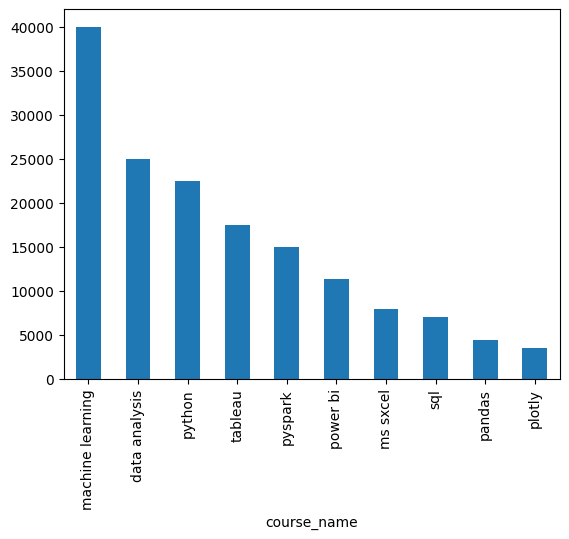

In [142]:
registration.merge(courses, how= 'inner', on= 'course_id').groupby('course_name')['price'].sum().sort_values(ascending= False).plot(kind='bar')

<h3>🚀Q5. find students who enrolled in both the months


In [158]:
common_student_id = np.intersect1d(nov['student_id'], dec['student_id'])

common_student_id

array([ 1,  3,  7, 11, 16, 17, 18, 22, 23])

In [160]:
students[students['student_id'].isin(common_student_id)]

,student_id,name,partner
0,1,Kailash Harjo,23
2,3,Parveen Bhalla,3
6,7,Tarun Thaker,9
10,11,David Mukhopadhyay,20
15,16,Elias Dodiya,25
16,17,Yasmin Palan,7
17,18,Fardeen Mahabir,13
21,22,Yash Sethi,21
22,23,Chhavi Lachman,18


<h3> 🚀 Q6. find course that got no enrollment

In [181]:
enroll_course_id = np.setdiff1d(courses['course_id'], registration['course_id'])

enroll_course_id


array([11, 12])

In [182]:
courses[courses['course_id'].isin(enroll_course_id)]

,course_id,course_name,price
10,11,Numpy,699
11,12,C++,1299


<h3> 🚀 Q7. find students who did not enroll into any courses

In [187]:
students_not_enroll = np.setdiff1d(students['student_id'],registration['student_id'])

students_not_enroll

array([ 4,  5,  6,  8,  9, 10, 20, 26, 27, 28])

In [ ]:
print(f"The {students[students['student_id'].isin(students_not_enroll)].shape[0]} student does not enroll in any course")

students[students['student_id'].isin(students_not_enroll)]

The 10 student does not enroll in any course


,student_id,name,partner
3,4,Marlo Dugal,14
4,5,Kusum Bahri,6
5,6,Lakshmi Contractor,10
7,8,Radheshyam Dey,5
8,9,Nitika Chatterjee,4
9,10,Aayushman Sant,8
19,20,Hanuman Hegde,11
25,26,Nitish,28
26,27,Ankit,26
27,28,Rahul,17


<h3> 🚀Q8. Print student name -> partner name for all enrolled students

In [220]:
# self join

students_and_partner = students.merge(students, how='inner', left_on='partner', right_on='student_id')

students_and_partner[['student_id_x','name_x','name_y']]

# isme ham log self join kar rhe hai par left table par on the bases of partner and right table me on the bases of student_id

,student_id_x,name_x,name_y
0,1,Kailash Harjo,Chhavi Lachman
1,2,Esha Butala,Kailash Harjo
2,3,Parveen Bhalla,Parveen Bhalla
3,4,Marlo Dugal,Pranab Natarajan
4,5,Kusum Bahri,Lakshmi Contractor
5,6,Lakshmi Contractor,Aayushman Sant
6,7,Tarun Thaker,Nitika Chatterjee
7,8,Radheshyam Dey,Kusum Bahri
8,9,Nitika Chatterjee,Marlo Dugal
9,10,Aayushman Sant,Radheshyam Dey


In [222]:
registration.merge(students_and_partner, left_on='student_id', right_on="student_id_x")[['student_id','course_id','name_x','name_y']]

,student_id,course_id,name_x,name_y
0,23,1,Chhavi Lachman,Fardeen Mahabir
1,15,5,Preet Sha,Elias Dodiya
2,18,6,Fardeen Mahabir,Munni Varghese
3,23,4,Chhavi Lachman,Fardeen Mahabir
4,16,9,Elias Dodiya,Shashank D’Alia
5,18,1,Fardeen Mahabir,Munni Varghese
6,1,1,Kailash Harjo,Chhavi Lachman
7,7,8,Tarun Thaker,Nitika Chatterjee
8,22,3,Yash Sethi,Seema Kota
9,15,1,Preet Sha,Elias Dodiya


<h3> 🚀 Q9. find top 3 students who did most number enrollments

In [264]:
# method 1

enrollment_counts = registration['student_id'].value_counts().head(3)

enrollment_counts.reset_index()


,student_id,count
0,23,6
1,7,5
2,1,4


In [265]:

pd.merge(enrollment_counts, students[['student_id', 'name']], on='student_id', how='left')

,student_id,count,name
0,23,6,Chhavi Lachman
1,7,5,Tarun Thaker
2,1,4,Kailash Harjo


In [278]:
# method 2 

registration.merge(students, on="student_id").groupby(['student_id','name'])['name'].count().sort_values(ascending=False).head(3)

student_id  name            
23          Chhavi Lachman      6
7           Tarun Thaker        5
14          Pranab Natarajan    4
Name: name, dtype: int64

<h3> 🚀Q10. find top 3 students who spent most amount of money on courses

In [289]:
registration.merge(students, on='student_id').merge(courses, on='course_id').groupby(['student_id','name'])['price'].sum().sort_values(ascending=False).head(3).reset_index()

,student_id,name,price
0,23,Chhavi Lachman,22594
1,14,Pranab Natarajan,15096
2,19,Qabeel Raman,13498


<center><h3><b> Alternate syntax for merge

In [290]:
pd.merge(students,registration, how="inner", on="student_id")

,student_id,name,partner,course_id
0,1,Kailash Harjo,23,1
1,1,Kailash Harjo,23,6
2,1,Kailash Harjo,23,10
3,1,Kailash Harjo,23,9
4,2,Esha Butala,1,5
5,3,Parveen Bhalla,3,3
6,3,Parveen Bhalla,3,5
7,7,Tarun Thaker,9,8
8,7,Tarun Thaker,9,10
9,7,Tarun Thaker,9,7


<center><h2><b> 🚀 IPL Questions

In [ ]:
# find top 3 stadiums with highest sixes/match ratio
# find orange cap holder of all the seasons

<h3> 🚀 Q1.Find top 3 stadiums with highest sixes/match ratio

In [330]:
matches_and_ball = matches.merge(deliveries, left_on="id", right_on="match_id")


In [331]:
number_of_sixes_per_venue = matches_and_ball[matches_and_ball['batsman_runs'] == 6].groupby('venue')['venue'].count().sort_values(ascending=False)

number_of_sixes_per_venue

venue
M Chinnaswamy Stadium                                   873
Wankhede Stadium                                        657
Feroz Shah Kotla                                        636
Eden Gardens                                            594
MA Chidambaram Stadium, Chepauk                         507
Rajiv Gandhi International Stadium, Uppal               492
Punjab Cricket Association Stadium, Mohali              307
Sawai Mansingh Stadium                                  243
Dr DY Patil Sports Academy                              173
Maharashtra Cricket Association Stadium                 169
Subrata Roy Sahara Stadium                              141
Kingsmead                                               130
Sardar Patel Stadium, Motera                            130
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium     129
SuperSport Park                                         120
Brabourne Stadium                                       114
Himachal Pradesh Cricket Associati

In [332]:
number_of_matches = matches['venue'].value_counts()

number_of_matches

venue
M Chinnaswamy Stadium                                   66
Eden Gardens                                            61
Feroz Shah Kotla                                        60
Wankhede Stadium                                        57
Rajiv Gandhi International Stadium, Uppal               49
MA Chidambaram Stadium, Chepauk                         48
Punjab Cricket Association Stadium, Mohali              35
Sawai Mansingh Stadium                                  33
Dr DY Patil Sports Academy                              17
Subrata Roy Sahara Stadium                              17
Maharashtra Cricket Association Stadium                 15
Kingsmead                                               15
Sardar Patel Stadium, Motera                            12
SuperSport Park                                         12
Brabourne Stadium                                       11
Punjab Cricket Association IS Bindra Stadium, Mohali    11
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadiu

In [334]:
(number_of_sixes_per_venue / number_of_matches).sort_values(ascending=False).head(3)

venue
Holkar Cricket Stadium     17.600000
M Chinnaswamy Stadium      13.227273
Sharjah Cricket Stadium    12.666667
dtype: float64

<h3> Q2. Find orange cap holder of all the seasons

In [356]:
matches_and_ball.groupby(['batsman','season'])['batsman_runs'].sum().sort_values(ascending=False).reset_index().drop_duplicates(subset=['season'],keep='first').sort_values('season')

,batsman,season,batsman_runs
10,SE Marsh,2008,616
13,ML Hayden,2009,572
9,SR Tendulkar,2010,618
11,CH Gayle,2011,608
3,CH Gayle,2012,733
2,MEK Hussey,2013,733
6,RV Uthappa,2014,660
17,DA Warner,2015,562
0,V Kohli,2016,973
7,DA Warner,2017,641
